<a href="https://colab.research.google.com/github/2714830587-xh/CLRS-GG/blob/master/chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install d2l

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [15]:
!pip uninstall matplotlib
!pip install matplotlib==3.0.0

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
  Using cached matplotlib-3.0.0-cp37-cp37m-manylinux1_x86_64.whl (12.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yell

# **AlexNET**

loss 0.330, train acc 0.879, test acc 0.883
416.7 examples/sec on cuda:0


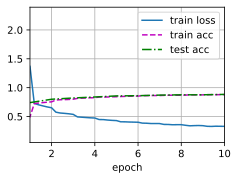

In [ ]:

import torch
import torch.nn as nn
from d2l import torch as d2l

net=nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=96,kernel_size=(11,11),stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(in_channels=96,out_channels=256,kernel_size=(5,5),padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3),stride=2),
    nn.Conv2d(256,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,384,(3,3),padding=1),
    nn.ReLU(),
    nn.Conv2d(384,256,(3,3),padding=1),
    nn.ReLU(),
    nn.MaxPool2d((3,3),stride=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.ReLU(),
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096,10)
)


x=torch.randn(1,1,224,224)
for layer in net:
  x=layer(x)
  print(layer.__class__.__name__,"output shape:\t",x.shape)
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
with torch.no_grad():
    n_sample=0
    n_correct=0
    n_class_correct=[0 for i in range(10)]
    n_class_sample=[0 for i in range(10)]
    for imgs,labels in  test_iter:
        imgs=imgs.to(device)
        
        labels=labels.to(device)
        
        output=net(imgs)
        _,pre_index=torch.max(output,1)
        n_correct+=(pre_index==labels).sum().item()
        n_sample+=len(labels)
        for i in range(len(pre_index)):
            if(pre_index[i]==labels[i]):
                n_class_correct[labels[i]]+=1
            n_class_sample[labels[i]]+=1
    print("acc",(n_correct/n_sample)*100)
    for i in range(10):
        acc=100*n_class_correct[i]/(n_class_sample[i])
        print(f"{text_labels[i]}   ,{acc}")

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


acc 88.31
t-shirt   ,87.3
trouser   ,97.0
pullover   ,76.7
dress   ,91.3
coat   ,82.0
sandal   ,97.6
shirt   ,63.4
sneaker   ,94.5
bag   ,97.8
ankle boot   ,95.5


# **Pytorch 计算模型的FLOPs和参数量**

In [ ]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'AlexNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))


Sequential(
  46.76 M, 100.000% Params, 939.87 MMac, 100.000% MACs, 
  (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.634% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
  (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.209% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=(3, 3), stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.561% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
  (8): Conv2d(1.33 M, 2.839% Params, 191.16 MMac, 20.339% MACs, 384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 

# **VGG**

In [2]:
import torch
from torch import nn
from d2l import torch as d2l


def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)


conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


loss 0.174, train acc 0.935, test acc 0.925
709.6 examples/sec on cuda:0


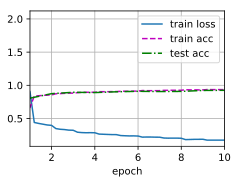

In [3]:
# 由于VGG-11比AlexNet计算量更大，因此我们构建了一个通道数较少的网络，足够用于训练Fashion-MNIST数据集。
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)


lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

NiN

In [7]:
import torch
from torch import nn
from d2l import torch as d2l


def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())
    

net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),


    nn.Dropout(0.5),#这个的作用


    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为(批量大小,10)
    nn.Flatten())

In [8]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.353, train acc 0.868, test acc 0.850
1058.8 examples/sec on cuda:0


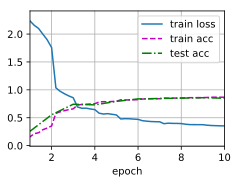

In [9]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

# **GoogLeNet**
Inception->原文模型

In [18]:
import torch
import torch.nn as nn
from d2l import torch as d2l


class Inception(nn.Module):
    def __init__(self,in_channels,c1,c2,c3,c4):
        super(Inception, self).__init__()
        self.conv1=nn.Sequential(nn.Conv2d(in_channels,c1,kernel_size=1),nn.ReLU())
        self.conv2=nn.Sequential(nn.Conv2d(in_channels,c2[0],kernel_size=1),nn.ReLU(),
                                 nn.Conv2d(c2[0],c2[1],kernel_size=3,padding=1))
        self.conv3=nn.Sequential(nn.Conv2d(in_channels,c3[0],kernel_size=1),nn.ReLU(),
                                nn.Conv2d(c3[0],c3[1],kernel_size=5,padding=2),nn.ReLU())
        self.conv4=nn.Sequential(nn.MaxPool2d(3,stride=1,padding=1),nn.Conv2d(in_channels,c4,kernel_size=1))
    def forward(self, x):
        return torch.cat(
            (self.conv1(x),self.conv2(x),self.conv3(x),self.conv4(x)),dim=1
        )
class GoogleNet(nn.Module):
  def __init__(self,in_channels,classes):
    super(GoogleNet,self).__init__()
    self.model = nn.Sequential(
              nn.Conv2d(in_channels,out_channels=64,kernel_size=7,stride=2,padding=3),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              nn.Conv2d(in_channels=64,out_channels=64,kernel_size=1),nn.ReLU(),
              nn.Conv2d(in_channels=64,out_channels=192,kernel_size=3,padding=1),nn.ReLU(),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(192,c1=64,c2=[96,128],c3=[16,32],c4=32),
              Inception(256,c1=128,c2=[128,192],c3=[32,96],c4=64),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(480,c1=192,c2=[96,208],c3=[16,48],c4=64),
              Inception(512,c1=160,c2=[112,224],c3=[24,64],c4=64),
              Inception(512,c1=128,c2=[128,256],c3=[24,64],c4=64),
              Inception(512,c1=112,c2=[144,288],c3=[32,64],c4=64),
              Inception(528,c1=256,c2=[160,320],c3=[32,128],c4=128),
              nn.MaxPool2d(kernel_size=3,stride=2,padding=1),
              Inception(832,c1=256,c2=[160,320],c3=[32,128],c4=128),
              Inception(832,c1=384,c2=[192,384],c3=[48,128],c4=128),
              nn.AvgPool2d(kernel_size=7,stride=1),
              nn.Dropout(p=0.4),
              nn.Flatten(),
              nn.Linear(1024,classes),
              nn.Softmax(dim=1)
            )
  def forward(self,X:torch.tensor):
    for layer in self.model:
      X = layer(X)
      print(layer.__class__.__name__,'output shape:',X.shape)
X = torch.randn(size=(1,3,224,224))
net = GoogleNet(3,1000)
net(X)

Conv2d output shape: torch.Size([1, 64, 112, 112])
ReLU output shape: torch.Size([1, 64, 112, 112])
MaxPool2d output shape: torch.Size([1, 64, 56, 56])
Conv2d output shape: torch.Size([1, 64, 56, 56])
ReLU output shape: torch.Size([1, 64, 56, 56])
Conv2d output shape: torch.Size([1, 192, 56, 56])
ReLU output shape: torch.Size([1, 192, 56, 56])
MaxPool2d output shape: torch.Size([1, 192, 28, 28])
Inception output shape: torch.Size([1, 256, 28, 28])
Inception output shape: torch.Size([1, 480, 28, 28])
MaxPool2d output shape: torch.Size([1, 480, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 512, 14, 14])
Inception output shape: torch.Size([1, 528, 14, 14])
Inception output shape: torch.Size([1, 832, 14, 14])
MaxPool2d output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 832, 7, 7])
Inception output shape: torch.Size([1, 1024, 7, 7])
AvgPool2d output shape:

In [19]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l


class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        # 线路1，单1x1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        # 线路2，1x1卷积层后接3x3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        # 线路3，1x1卷积层后接5x5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        # 线路4，3x3最大汇聚层后接1x1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)

    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24, 64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1,1)),
                   nn.Flatten())

net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


loss 0.291, train acc 0.890, test acc 0.883
957.1 examples/sec on cuda:0


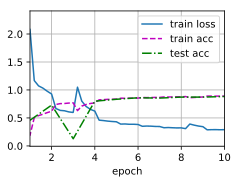

In [20]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())


In [21]:
!pip install pip install ptflops
from ptflops import get_model_complexity_info
model_name = 'GoogLeNet'
flops, params = get_model_complexity_info(net, (1, 224, 224), as_strings=True, 
print_per_layer_stat=True)#不用写batch_size大小，默认batch_size=1
print("%s |%s |%s" % (model_name, flops, params))

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=bfe536fd33d51c61caabc4d5085026cf21ef6ec49e4dbb943284f2dec7d12185
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops
Sequential(
  5.978 M, 100.000% Params, 1.511 GMac, 100.000% MACs, 
  (0): Sequential(
    0.003 M, 0.054% Params, 0.042 GMac, 2.763% MACs, 
    (0): Conv2d(0.003 M, 0.054% Params, 0.04 GMac, 2.657% MACs, 1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.053% MACs, )
    (2): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.053% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (1): Sequential(
    0.115 M, 1.923% Params, 0.362 GMac, 23.953% MACs, 
    (0): Conv2d(0.004 M, 0.070% Params, 0.013 GMac, 0.864% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU(0.0 M, 0.000% Params, 0.0 GMac, 0.013% MACs, )
    (2): C